# Описание проекта

Необходимо создать модель, котоаря должна предсказать коэффициент восстановления золота из золотосодержащей руды. В распоряжении данные с параметрами добычи и очистки. 

### План работы:
<a href='#step_1'>Шаг 1. Подготовка данных.</a><br>
На первом этапе импортируем необходимые библиотеки и читаем файл, знакомимся с общей информацией, выставляем необходимые типы данных, проверяем пропуски, анализируем признаки в тестовой и тренировочной выборках, проверяем корректность рассчетов.<br>
<a href='#step_2'>Шаг 2. Анализ</a><br>
Анализ значений параметров на разных этапах обработки.<br>
<a href='#step_3'>Шаг 3. Обучение и тестирование модели.</a><br>
Обучение моделей и подбор гиперпараметров.<br>
<a href='#step_5'>Шаг 4. Общий вывод.</a><br>

# 1. Подготовка данных

<a href='#step_1'>Шаг 1. Подготовка данных.</a><br>
<a href='#step_2'>Шаг 2. Анализ</a><br>
<a href='#step_3'>Шаг 3. Обучение и тестирование модели.</a><br>
<a href='#step_5'>Шаг 4. Общий вывод.</a><br>

<a id = 'step_1'></a>

In [1]:
import pandas as pd 
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from numpy.random import RandomState
from scipy import stats as st

In [2]:
state = RandomState(42)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [5]:
data_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16502.000000,16224.000000,16778.000000,16777.000000,16761.000000,16579.000000,16777.000000,16820.000000,16827.000000,16820.000000,16833.000000,16822.000000,16833.000000,16821.000000,16833.000000,1.683300e+04,1.683300e+04,1.683300e+04,15618.000000,16778.000000,16632.000000,16347.000000,16443.000000,16568.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000,16778.000000,16778.000000,16698.000000,16778.000000,14287.000000,14610.000000,16778.000000,14611.000000,14611.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16814.000000,16802.000000,16809.000000,16257.000000,16809.000000,16802.000000,16802.000000,16776.000000,16764.000000,14874.000000,16778.000000,16497.000000,16751.000000,16705.000000,16748.000000,16763.000000,16747.000000,16752.000000,16750.000000,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

Присутствуют пустые значения. Типы данных корректны.

In [7]:
F = data_train['rougher.input.feed_au']

In [8]:
C = data_train['rougher.output.concentrate_au']

In [9]:
T = data_train['rougher.output.tail_au']

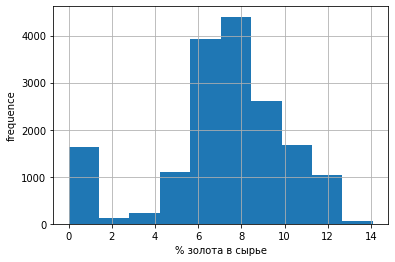

In [10]:
plt.xlabel('% золота в сырье')
plt.ylabel('frequence')
F.hist()

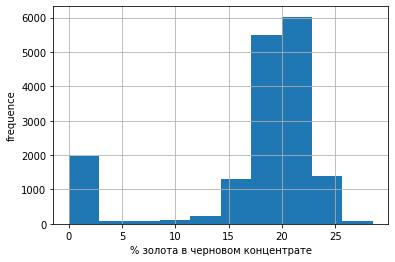

In [11]:
plt.xlabel('% золота в черновом концентрате')
plt.ylabel('frequence')
C.hist()

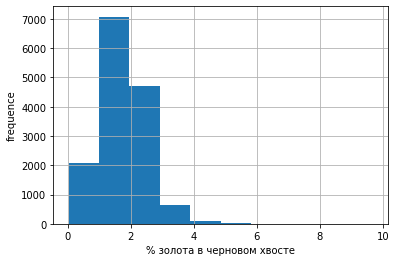

In [12]:
plt.xlabel('% золота в черновом хвосте')
plt.ylabel('frequence')
T.hist()

Выделяющихся значений нет, всё выглядит вполне логично, до обработки содержание золота меньше, после - больше. В хвосте маленький % золота.

In [13]:
recovery_handmade = ((C* (F-T)) / (F * (C-T))) * 100

In [14]:
recovery_handmade.describe()

count    1.457700e+04
mean              NaN
std               NaN
min              -inf
25%      7.965104e+01
50%      8.521533e+01
75%      9.019726e+01
max               inf
dtype: float64

In [15]:
len(recovery_handmade)

16860

Расчитанный руками recovery.

In [16]:
recovery_handmade.isna().sum()

2283

заменим пропуски медианой.

In [17]:
recovery_handmade.fillna(recovery_handmade.median(), inplace = True)

In [18]:
recovery_handmade.isna().sum()

0

In [19]:
data_train['rougher.output.recovery'].isna().sum()

2573

Так же заменим для датасета.

In [20]:
data_train['rougher.output.recovery'].fillna(data_train['rougher.output.recovery'].median(),inplace = True)

In [21]:
data_train['rougher.output.recovery'].isna().sum()

0

Проблема с бесконечными, и отрицательными, и большими значениями, оставим значения ручного подсчета в пределах от 0-100% и значения в общем датасете с индексами значений ручного подсчета после обрезания.(потеря нескольких сотен строк незначительна).

In [22]:
len(recovery_handmade[(recovery_handmade >= 0) & (recovery_handmade <= 100)])

16570

In [23]:
test = data_train
test['recovery'] = recovery_handmade
test[(test['recovery'] < 0) | (test['recovery'] > 100)][['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au']]

,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au
53,7.548341,3.507147,2.187465
372,0.139652,4.642559,2.574309
377,3.501578,15.084039,5.964024
560,1.921101,19.619751,1.939904
700,0.253075,1.483835,1.477470
...,...,...,...
16697,11.035269,6.038533,1.343570
16698,10.943209,10.712677,1.858404
16699,10.149224,0.010000,1.729189
16700,10.591710,0.010000,1.481931


Выдающиеся значения recovery получились там, где после очистки всё стало слишком хорошо (большое повышение % золота), либо слишком плохо (сильное уменьшение содержания золота после очистки).

In [24]:
indexes =  recovery_handmade[(recovery_handmade >= 0) & (recovery_handmade <= 100)].index

In [25]:
recovery_handmade = recovery_handmade[indexes]

In [26]:
default = data_train['rougher.output.recovery'].loc[indexes]

In [27]:
mean_absolute_error(recovery_handmade, default)

0.002847854164461882

В среднем присланные данные отличаются от рассчитанных вручную на 0.3%. Возможно, данные могли округляться при автоматических расчетах.

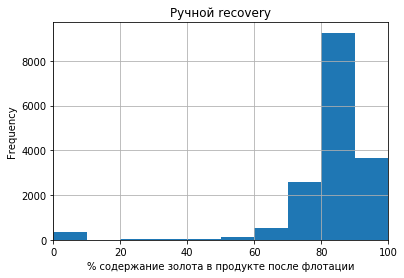

In [28]:
plt.xlabel('% содержание золота в продукте после флотации')
recovery_handmade.plot(kind = 'hist', xlim = (0,100), grid = True, title = 'Ручной recovery')

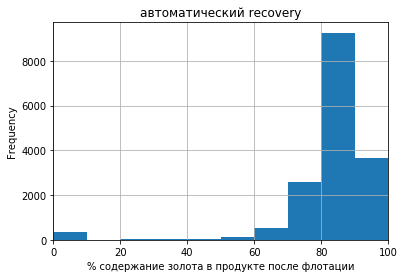

In [29]:
plt.xlabel('% содержание золота в продукте после флотации')
default.plot(kind = 'hist', xlim = (0,100), grid = True, title = 'автоматический recovery')

распределения одинаковые. Расчеты производились корректно.

In [30]:
data_train.columns[data_train.columns.isin(data_test.columns) == False]

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

В тестовой выборке нет 'final.output.recovery', потому что его надо предсказать.  Остальные столбцы можно взять из полной таблицы.<br>
Все признаки количественные (тип - float).<br>

Заполним пропуски в общем датасете (медианными значениями столбцов) и перенесем строки в тестовый и тренировочный датасеты по индексам, который найдем по одниаковой дате.

In [31]:
data_full.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [32]:
for column in data_full.columns.drop('date'):
    data_full[column].fillna(data_full[column].median(), inplace = True)

In [33]:
date = list(data_full['date'])
indexes = list(data_train['date'].apply(lambda x: date.index(x)))
indexes_test = list(data_test['date'].apply(lambda x: date.index(x)))

Добавим целевые метрики в data_test.

In [34]:
data_test[['rougher.output.recovery', 'final.output.recovery']] = data_full.loc[indexes_test, ['rougher.output.recovery', 'final.output.recovery']]

Оставим в тренировочном сете фичи, доступные в тестовом и 2 целевые переменные.

In [35]:
data_train = data_full.loc[indexes, data_test.columns]

In [36]:
data_train

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,999.719565,-400.074028,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,1600.449520,-500.052575,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578

In [37]:
scaler = StandardScaler()
columns = data_train.columns.drop(['rougher.output.recovery', 'final.output.recovery', 'date'])
features_train, _= train_test_split(data_train[columns], test_size = 0.25, random_state = state)
scaler.fit(features_train)
data_train[columns] = scaler.transform(data_train[columns])

In [38]:
data_train.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,-0.073795,0.436125,-0.081497,0.350934,0.073796,0.085080,0.071702,-0.117397,0.087830,0.102874,0.192907,0.096276,-0.549768,-0.637962,0.552948,-0.133950,0.353238,-0.225164,0.194441,0.323886,0.276584,0.151996,-0.263278,-0.177470,1.059856,0.581108,1.080902,0.484813,1.382862,0.388396,1.283519,0.290769,1.572139,0.341745,-0.281248,0.214491,0.031181,0.202465,-0.488108,-0.020038,0.038704,0.032525,-0.744703,-0.098763,-0.449923,-0.311686,-0.861971,0.024280,-0.691105,-0.018246,-0.616463,-1.084305,87.107763,70.541216
1,2016-01-15 01:00:00,-0.107227,0.483229,-0.081497,0.385109,0.143399,0.059307,0.136124,0.090447,0.154110,0.094593,0.238221,0.032737,-0.530388,-0.650812,0.564330,-0.060257,0.262210,-0.227687,0.190454,0.322734,0.312092,0.157538,-0.261291,-0.141858,1.053034,0.363493,1.075405,0.371099,1.387728,0.409348,1.265336,0.357493,1.511677,0.367646,-0.277915,0.198084,0.030670,0.214109,-0.487031,-0.076843,0.060383,0.031108,-0.748281,-0.134515,-0.474901,-0.273568,-0.845284,0.000099,-0.706415,-0.019605,-0.638570,-1.006054,86.843261,69.266198
2,2016-01-15 02:00:00,-0.148582,0.769304,-0.081497,0.357094,0.210360,0.071040,0.200335,0.081123,0.220109,0.074738,0.294688,0.022396,-0.544638,-0.723242,0.595234,-0.050718,0.281037,-0.266472,0.177378,0.421973,0.295196,0.314607,-0.263235,-0.141937,1.048750,0.362707,1.073065,0.369252,1.385653,0.409339,1.265176,0.371036,1.513847,0.361840,-0.262761,0.198757,0.030315,0.218846,-0.494048,-0.069267,0.339678,0.025023,-0.744968,-0.099153,-0.481212,-0.271336,-0.840632,0.000630,-0.701717,-0.018815,-0.634190,-1.027251,86.842308,68.116445
3,2016-01-15 03:00:00,-0.183999,0.770948,-0.081497,0.370547,0.206174,0.058701,0.201051,0.092820,0.215797,0.076552,0.296734,0.019797,-0.567978,-0.806155,0.677215,-0.039118,0.357866,-0.347813,0.102287,0.424977,0.244446,0.308019,-0.262908,-0.143060,1.050932,0.353975,1.074051,0.369908,1.379153,0.406589,1.271285,0.369691,1.513549,0.372314,-0.270385,0.207199,0.038827,0.220007,-0.487488,-0.075940,0.339190,0.024451,-0.741836,-0.079428,-0.466705,-0.272015,-0.855401,0.012689,-0.707614,-0.0

Провел масштабирование данных.

Повторим те же заполнения и масштабирование для тестовой выборки.

In [39]:
indexes_test = list(data_test['date'].apply(lambda x: date.index(x)))

In [40]:
data_test = data_full.loc[indexes_test, data_test.columns]

In [41]:
data_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
5521,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
5522,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
5523,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
5524,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5

In [42]:
scaler = StandardScaler()
columns = data_test.columns.drop(['rougher.output.recovery', 'final.output.recovery', 'date'])
features_train, _= train_test_split(data_test[columns], test_size = 0.25, random_state = state)
scaler.fit(features_train)
data_test[columns] = scaler.transform(data_test[columns])

In [43]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
5521,2016-09-01 00:59:59,0.872871,1.988814,1.337174,-0.436538,-0.277505,0.138352,-0.290789,0.168117,-0.232361,0.138870,-0.290409,0.165193,1.486401,1.594860,0.197534,0.298858,0.646152,1.219788,0.908189,0.001414,0.849745,-0.213970,-0.069271,0.536361,-0.085663,1.497817,-0.025401,1.513737,0.087913,1.512039,-0.099225,1.142178,-0.074296,1.152104,-0.108738,0.208355,-1.047872,0.189079,-0.554600,0.939855,-0.805660,1.077316,-0.787512,0.292401,-1.202841,-0.241644,-1.175456,1.368151,-1.399524,0.072811,1.856132,0.174056,89.993421,70.273583
5522,2016-09-01 01:59:59,0.967648,1.987107,1.337174,-0.457777,-0.278168,0.141129,-0.294308,0.170245,-0.245242,0.162580,-0.288776,0.150907,1.455392,1.511178,0.199525,0.266355,0.568629,1.160840,0.928444,-0.091640,0.878105,-0.347939,-0.083420,0.535123,-0.090431,1.482599,-0.026222,1.509366,0.095781,1.503695,-0.096913,1.142766,-0.071401,1.040728,-0.111443,0.219333,-1.050702,0.177122,-0.558368,0.943722,-0.791759,1.073529,-0.780057,0.277842,-1.176214,-0.225727,-1.172328,-0.239187,-1.397606,0.070965,1.542133,0.172462,88.089657,68.910432
5523,2016-09-01 02:59:59,0.964913,1.351523,0.857380,-0.449642,-0.279094,0.127737,-0.291708,0.170451,-0.238969,0.115436,-0.288811,0.161659,1.489709,1.435922,0.196409,0.480758,0.694815,1.222369,0.925898,-0.181064,0.875023,-0.482203,-0.084199,0.541512,-0.093820,1.476822,-0.030770,1.482409,0.093169,1.488101,-0.097247,1.146564,-0.070850,1.112812,-0.114148,0.211386,-1.039602,0.173468,-0.551866,0.941677,-0.793741,1.080154,-0.800701,0.276682,-1.184153,-0.237203,-1.142195,0.191135,-1.389656,0.075897,1.537462,0.160827,88.412756,68.143213
5524,2016-09-01 03:59:59,0.966488,1.086070,0.617483,-0.643069,-0.275431,0.160845,-0.296295,0.178772,-0.232275,0.176899,-0.283755,0.141359,1.241771,1.200101,0.113170,0.175467,0.556766,1.254592,0.808829,-0.210406,0.772032,-0.527285,-0.076316,0.537641,-0.080041,1.506025,-0.022815,1.507201,0.091852,1.548545,-0.088496,1.128650,-0.068955,1.128352,-0.116853,0.226332,-1.053104,0.191492,-0.552957,0.953892,-0.802129,1.082385,-0.785456,0.283421,-1.189265,-0.224190,-1.188674,0.189

In [44]:
data_full.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [45]:
data_train.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [46]:
data_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Пропусков нет, данные масштабированны и готовы к дальнейшему анализу.

# 2. Анализ данных

<a href='#step_1'>Шаг 1. Подготовка данных.</a><br>
<a href='#step_2'>Шаг 2. Анализ</a><br>
<a href='#step_3'>Шаг 3. Обучение и тестирование модели.</a><br>
<a href='#step_5'>Шаг 4. Общий вывод.</a><br>

<a id = 'step_2'></a>

In [47]:
data_rougher = data_full[
    ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au',
     'rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'rougher.output.tail_ag',
     'rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'rougher.output.tail_pb']
]
pd.DataFrame(data = data_rougher).head(20)

,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au,rougher.input.feed_ag,rougher.output.concentrate_ag,rougher.output.tail_ag,rougher.input.feed_pb,rougher.output.concentrate_pb,rougher.output.tail_pb
0,6.486150,19.793808,1.170244,6.100378,11.500771,5.008018,2.284912,7.101074,0.508728
1,6.478583,20.050975,1.184827,6.161113,11.615865,4.955378,2.266033,7.278807,0.536689
2,6.362222,19.737170,1.162562,6.116455,11.695753,4.843460,2.159622,7.216833,0.546416
3,6.118189,19.320810,1.079755,6.043309,11.915047,4.655288,2.037807,7.175616,0.542525
4,5.663707,19.216101,1.012642,6.060915,12.411054,4.552800,1.786875,7.240205,0.515438
5,5.687168,18.950385,0.915835,5.801920,11.985584,4.397415,1.879351,7.121903,0.491350
6,6.038436,19.319591,0.986248,6.056253,11.684307,4.478080,2.105501,7.304849,0.518266
7,6.433854,19.507897,1.116110,5.955053,11.182624,4.728325,2.310432,7.258496,0.548067
8,6.526612,19.789465,1.186780,5.878084,11.051323,4.764300,2.391713,7.380043,0.599181
9,6.633002,19.497669,1.167140,5.908793,11.116297,4.667157,2.440899,7.297363,0.615418


На флотации концентрация золота увеличивается, серебра - увеличивается, свинца - увеличивается.

In [48]:
data_primary_cleaner = data_full[
    ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_au',
     'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.tail_ag',
     'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.tail_pb']
]
pd.DataFrame(data = data_primary_cleaner).head(20)

,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_au,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,primary_cleaner.output.tail_ag,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,primary_cleaner.output.tail_pb
0,19.793808,34.174427,2.106679,11.500771,8.547551,14.936526,7.101074,10.389648,2.534912
1,20.050975,34.118526,2.353017,11.615865,8.558743,16.250511,7.278807,10.497069,3.049646
2,19.737170,33.969464,2.416800,11.695753,8.603505,16.491823,7.216833,10.354494,3.124664
3,19.320810,28.260743,2.262051,11.915047,7.221879,16.024359,7.175616,8.496563,2.960362
4,19.216101,33.044932,2.277073,12.411054,9.089428,16.480185,7.240205,9.986786,3.112100
5,18.950385,32.070664,2.114558,11.985584,9.553724,15.931540,7.121903,9.816215,2.844511
6,19.319591,33.184823,2.223152,11.684307,8.968869,16.078368,7.304849,10.081306,2.938979
7,19.507897,34.027719,2.112025,11.182624,8.545238,15.797720,7.258496,10.224540,2.881529
8,19.789465,34.964974,2.243817,11.051323,8.046686,16.195420,7.380043,10.500065,3.089922
9,19.497669,34.826500,2.025454,11.116297,8.098985,15.535214,7.297363,10.525324,2.866688


На первичной очистке концентрация золота увеличивается, серебра - уменьшается, свинца - увеличивается.

In [49]:
data_secondary_cleaner = data_full[
    ['primary_cleaner.output.concentrate_au', 'final.output.concentrate_au', 'secondary_cleaner.output.tail_au',
     'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag', 'secondary_cleaner.output.tail_ag',
     'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb', 'secondary_cleaner.output.tail_pb']
]
pd.DataFrame(data = data_secondary_cleaner).head(20)

,primary_cleaner.output.concentrate_au,final.output.concentrate_au,secondary_cleaner.output.tail_au,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag,secondary_cleaner.output.tail_ag,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb,secondary_cleaner.output.tail_pb
0,34.174427,42.192020,2.606185,8.547551,6.055403,14.500184,10.389648,9.889648,4.694824
1,34.118526,42.701629,2.488248,8.558743,6.029369,14.265474,10.497069,9.968944,4.592547
2,33.969464,42.657501,2.458187,8.603505,6.055926,14.115662,10.354494,10.213995,4.624775
3,28.260743,42.689819,2.322062,7.221879,6.047977,13.732071,8.496563,9.977019,4.482453
4,33.044932,42.774141,2.330448,9.089428,6.148599,14.079996,9.986786,10.142511,4.470737
5,32.070664,41.633678,2.192127,9.553724,6.482968,13.615012,9.816215,10.049416,4.286817
6,33.184823,41.995316,2.316720,8.968869,6.533849,13.597056,10.081306,10.058141,4.487865
7,34.027719,42.452727,2.192197,8.545238,6.130823,13.177237,10.224540,9.935481,4.432448
8,34.964974,43.404078,2.212084,8.046686,5.834140,13.487870,10.500065,10.071156,4.608756
9,34.826500,43.235220,2.073737,8.098985,5.687063,13.209191,10.525324,9.980404,4.550553


На вторичной очистке концентрация золота увеличивается, серебра - уменьшается, свинца - уменьшается.

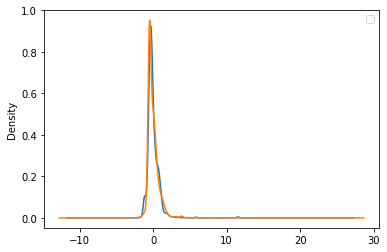

In [50]:
data_train['rougher.input.feed_size'].plot.kde()
data_test['rougher.input.feed_size'].plot.kde()
plt.legend('train', 'test')

График распределения плотности вероятностей размеров гранул. Из-за маштабированных данных можно посмотреть только распределение, но не определить какого размера гранул чаще пытаются придерживаться на производстве, но в данном проекте нас это не интересует.

In [51]:
rougher_sum = data_full['rougher.input.feed_au'] + data_full['rougher.input.feed_ag'] + data_full['rougher.input.feed_pb'] + data_full['rougher.input.feed_sol']
primary_cleaner_sum = data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_pb'] + data_full['rougher.output.concentrate_sol'] + data_full['rougher.output.concentrate_au']
secondary_cleaner_sum = data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_pb'] + data_full['final.output.concentrate_sol'] + data_full['final.output.concentrate_au']

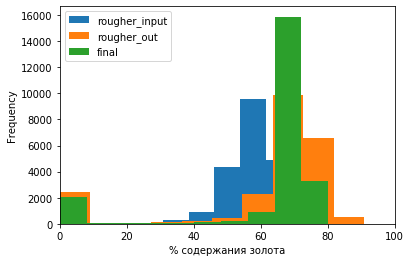

In [52]:
plt.xlim(0,100)
rougher_sum.plot(kind = 'hist')
primary_cleaner_sum.plot(kind = 'hist')
secondary_cleaner_sum.plot(kind = 'hist')
plt.xlabel('Суммарная концентрация веществ')
plt.legend(['rougher_input', 'rougher_out', 'final'])

Всё выглядит логично: начальная сумма меньше остальных в среднем, при флотации сумма увеличивается, при очистках остается на примерно том же месте.<br>
Значения близкие к 0 неправдоподобны - удалим их и, смотря на распределение, можно попробовать убрать еще значения до 10%.

In [53]:
data_full_correct = data_full.loc[
    rougher_sum[rougher_sum > 10].index &
    primary_cleaner_sum[primary_cleaner_sum > 10].index & 
    secondary_cleaner_sum[secondary_cleaner_sum > 10].index
]

In [54]:
rougher_sum_new = data_full_correct['rougher.input.feed_au'] + data_full_correct['rougher.input.feed_ag'] + data_full_correct['rougher.input.feed_pb'] + data_full_correct['rougher.input.feed_sol']
primary_cleaner_sum_new = data_full_correct['rougher.output.concentrate_ag'] + data_full_correct['rougher.output.concentrate_pb'] + data_full_correct['rougher.output.concentrate_sol'] + data_full_correct['rougher.output.concentrate_au']
secondary_cleaner_sum_new = data_full_correct['final.output.concentrate_ag'] + data_full_correct['final.output.concentrate_pb'] + data_full_correct['final.output.concentrate_sol'] + data_full_correct['final.output.concentrate_au']

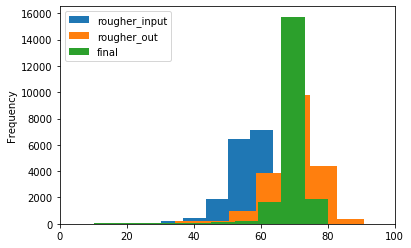

In [55]:
plt.xlim(0,100)
rougher_sum_new.plot(kind = 'hist')
primary_cleaner_sum_new.plot(kind = 'hist')
secondary_cleaner_sum_new.plot(kind = 'hist')
plt.legend(['rougher_input', 'rougher_out', 'final'])

После финальной очистки сумма стала в среднем меньше, чем после флотации - логично: увеличили % золота, уменьшили другие компоненты.<br>
Удалим аномалии из тестовой и тренировочной выборок по пересечению множеств индексов с общим датасетом.

In [56]:
data_full = data_full.loc[data_full_correct.index]
data_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [57]:
data_train = data_train.loc[set(data_full.index) & set(data_train.index), data_test.columns]

In [58]:
data_test = data_test.loc[set(data_full.index) & set(data_test.index), data_test.columns]

In [59]:
len(data_full)

19878

In [60]:
len(data_train) + len(data_test)

19878

# 3. Модель

<a href='#step_1'>Шаг 1. Подготовка данных.</a><br>
<a href='#step_2'>Шаг 2. Анализ</a><br>
<a href='#step_3'>Шаг 3. Обучение и тестирование модели.</a><br>
<a href='#step_5'>Шаг 4. Общий вывод.</a><br>

<a id = 'step_3'></a>

In [61]:
def sMAPE_calculation(y_true, y_pred):
    N = len(y_true)
    sMAPE = abs(y_true - y_pred) / ((abs(y_true) + abs(y_pred))/2)
    return sMAPE.sum() / N * 100

функция для вычисления метрики.

In [62]:
model_1 = LinearRegression()

In [63]:
features_full = data_full[data_test.columns].drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis = 1)
target_full = data_full['rougher.output.recovery'].astype('int')

In [64]:
cross_score_1 = cross_val_score(model_1, features_full, target_full, cv = 3, scoring = make_scorer(sMAPE_calculation))
print(cross_score_1.mean())

8.481890410523137


In [65]:
model_2 = RandomForestRegressor(n_estimators = 120, max_depth = 8, random_state = state)
cross_score_2 = cross_val_score(model_2, features_full, target_full, cv = 3, scoring = make_scorer(sMAPE_calculation))

In [66]:
print(cross_score_2.mean())

6.679247338786003


Лучшая модель - случайный лес.

In [67]:
features_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis = 1)
target_train = data_train['rougher.output.recovery'].astype('int')

In [68]:
features_test = data_test.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis = 1)
target_test = data_test['rougher.output.recovery'].astype('int')

In [69]:
model_2.fit(features_train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=120,
                      n_jobs=None, oob_score=False,
                      random_state=RandomState(MT19937) at 0x7F128D575D10,
                      verbose=0, warm_start=False)

In [70]:
model_predict_rougher = model_2.predict(features_test)
sMAPE_rougher = sMAPE_calculation(target_test, model_predict_rougher)

In [71]:
sMAPE_rougher

4.8795080348842115

Получили метрику на тестовой выборке по rougher recovery. Результат не хуже кросс-валидации - нет переобучения.<br>

Далее те же действия по final recovery.

In [72]:
target_full = data_full['final.output.recovery'].astype('int')

In [73]:
model_3 = LinearRegression()

In [74]:
cross_score_3 = cross_val_score(model_3, features_full, target_full, cv = 3, scoring = make_scorer(sMAPE_calculation))
print(cross_score_3.mean())

11.746415716886892


In [75]:
model_4 = RandomForestRegressor(n_estimators = 120, max_depth = 8, random_state = state)
cross_score_4 = cross_val_score(model_4, features_full, target_full, cv = 3, scoring = make_scorer(sMAPE_calculation))

Пока лес взял с такими параметрами, потом улучшу Grid Search'ем.

In [76]:
print(cross_score_4.mean())

10.087043455035609


Проверим на тесте.

In [77]:
target_train = data_train['final.output.recovery'].astype('int')
target_test = data_test['final.output.recovery'].astype('int')

In [78]:
model_4.fit(features_train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=120,
                      n_jobs=None, oob_score=False,
                      random_state=RandomState(MT19937) at 0x7F128D575D10,
                      verbose=0, warm_start=False)

In [79]:
model_predict_final = model_4.predict(features_test)
sMAPE_final = sMAPE_calculation(target_test, model_predict_final)

In [80]:
sMAPE_final

8.82771340274407

In [81]:
sMAPE_total = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final 
display(sMAPE_total)

7.840662060779105

Итоговая SMAPE метрика.

# Общий вывод

<a href='#step_1'>Шаг 1. Подготовка данных.</a><br>
<a href='#step_2'>Шаг 2. Анализ</a><br>
<a href='#step_3'>Шаг 3. Обучение и тестирование модели.</a><br>
<a href='#step_5'>Шаг 4. Общий вывод.</a><br>

<a id = 'step_5'></a>

При ознакомлении с данными обнаружены пустые значения, корректные типы данных. Выделяющихся значений нет, всё выглядит вполне логично, до обработки содержание золота меньше, после - больше. В хвосте маленький % золота. Пропуски в данных заменены ручным пересчетом.<br>
В тестовой выборке нет фичи 'final.output.recovery', потому что её надо предсказать. Остальные столбцы можно взять из полной таблицы.<br>
Все признаки количественные (тип - float).
Заполнил пропуски в общем датасете (медианными значениями столбцов) и перенес строки в тестовый и тренировочный датасеты по индексам с одинаковой дате.<br>
Оставил в тренировочном сете фичи, доступные в тестовом и 2 целевые переменные.<br>
Произвел масштабирование.<br>
<br>
На флотации концентрация золота увеличивается, серебра - увеличивается, свинца - увеличивается.<br>
На первичной очистке концентрация золота увеличивается, серебра - уменьшается, свинца - увеличивается.<br>
На вторичной очистке концентрация золота увеличивается, серебра - уменьшается, свинца - уменьшается.<br>
<br>
Построил график распределения суммарной концентрации на разных этапах: начальная сумма меньше остальных в среднем, при флотации сумма увеличивается, при очистках остается на примерно том же месте, но увеличивается содержание золота и уменьшаться остальных компонентов. Значения близкие к 0 неправдоподобны их удалили с добавлением низшего порога значения 10%.<br>
<br>
Далее написал фукнцию для вычисления метрики. (sMAPE)<br>
Нашел лучшую модель с помощью кросс-валидации.<br>
Проверил обученную модель на тестовых данных, получил финальное значение метрики sMAPE = 7.84066.